In [247]:
import json
import time
from datetime import datetime
import codecs
import sys
import io
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from itertools import cycle
import gmaps
%matplotlib inline

In [248]:
import meetup.api
from config import api_key
from config2 import gkey
client = meetup.api.Client()
client.api_key = api_key
gmaps.configure(api_key=gkey)

In [249]:
url= 'https://api.meetup.com/2/cities?&sign=true&photo-host=public&page=50'
response1 = requests.get(url).json()
response1

{'results': [{'zip': '44101',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 8.213475245332047,
   'city': 'Cleveland',
   'lon': -81.66999816894531,
   'ranking': 0,
   'id': 44101,
   'state': 'OH',
   'member_count': 13715,
   'lat': 41.4900016784668},
  {'zip': '44301',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 31.232327600657683,
   'city': 'Akron',
   'lon': -81.5199966430664,
   'ranking': 1,
   'id': 44301,
   'state': 'OH',
   'member_count': 4700,
   'lat': 41.040000915527344},
  {'zip': '44701',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 52.2636928342518,
   'city': 'Canton',
   'lon': -81.44999694824219,
   'ranking': 2,
   'id': 44701,
   'state': 'OH',
   'member_count': 1830,
   'lat': 40.72999954223633},
  {'zip': '44107',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 3.2778223272738454,
   'city': 'Lakewood',
   'lon': -81.79000091552734,
   'ranking': 3,
   'id': 

In [250]:
result1_df = pd.DataFrame(response1['results'])[['city', 'lat', 'lon', 'member_count', 'zip']]
result1_df = result1_df.set_index('city')
result1_df.head()

lat        lon  member_count    zip
city                                                
Cleveland  41.490002 -81.669998         13715  44101
Akron      41.040001 -81.519997          4700  44301
Canton     40.730000 -81.449997          1830  44701
Lakewood   41.480000 -81.790001          1002  44107
Medina     41.130001 -81.860001           752  44256

In [251]:
mem_count = result1_df['member_count'].sum()
print(mem_count)

32559


In [252]:
for zipCode in result1_df.zip:
    # Careful executing this call because the call is large and it takes a while, and we can run out of calls.
    group_url = 'https://api.meetup.com/find/groups?key=' + api_key + '&photo-host=public&zip=' + zipCode + '&page=1000000'
    
response2 = requests.get(group_url).json()
response2

[{'score': 1.0,
  'id': 1603993,
  'name': 'Northeast Ohio Hiking Club',
  'status': 'active',
  'link': 'https://www.meetup.com/NEOHiking/',
  'urlname': 'NEOHiking',
  'description': '<p>Hikers Unite! Short hikes, long hikes, easy hikes, moderate hikes, strenuous hikes, kid friendly hikes and dog friendly hikes! The mission is to provide a variety of hikes for hikers of all abilities to get together, enjoy nature and perhaps burn off a few calories in the process.</p>\n<p>\xa0</p>\n<p>All hikers\xa0participate\xa0at their own risk. Hiking should always be within your comfort and skill level. Please read the Meetup description carefully and email the event organizer if you have any question about your ability to complete the hike or other event. By signing up for a hike or other event you are stating that you are physically able to complete the event listed.\xa0\xa0You are responsible for your own safety and assume all risks and liabilities on all outings. Event organizers are unpaid 

In [253]:
result2_df = pd.DataFrame(response2)[['id','name','status','created','city','lat','lon','members','category']]

result2_df = result2_df.set_index('id')
result2_df.drop(result2_df.columns[0], axis=1)
result2_df.sort_values('members', ascending=False, inplace=True)

result2_df.head()
data=[]
for x in result2_df.category:
    data.append(x['name'])
data
result2_df.insert(8,'category_name',data)
result2_df = result2_df.drop('category', axis=1)
result2_df.head()

name  status        created  \
id                                                                   
693119        The Cleveland 20s & 30s Group  active  1190135836000   
7854222           Enjoy Outside - Cleveland  active  1364734329000   
1603993          Northeast Ohio Hiking Club  active  1266952168000   
494930                      nEo Adventurers  active  1178507477000   
593120   Cleveland Beer Lovers Meetup Group  active  1185754963000   

                 city    lat    lon  members         category_name  
id                                                                  
693119      Cleveland  41.51 -81.68     8414           Socializing  
7854222  Independence  41.38 -81.66     6384  Outdoors & Adventure  
1603993     Cleveland  41.38 -81.79     6091  Outdoors & Adventure  
494930      Cleveland  41.52 -81.56     6084  Outdoors & Adventure  
593120      Cleveland  41.38 -81.79     5340           Socializing

In [254]:
result2_df.to_csv("/Users/bryandickens/Desktop/Project_1_MeetupAPI/Project_1_MeetupAPI/MeetupMembership.csv", 
                  index=False, header=True)

In [255]:
result3_df = result2_df

In [256]:
result3_df['category_name'] = result3_df['category_name'].replace(
    {'Fitness': 'Other', 
     'Movies & Film': 'Other',
     'Language & Ethnic Identity': 'Other',
     'New Age & Spirituality': 'Other',
     'Support': 'Other',
     'Religion & Beliefs': 'Other',
     'Writing': 'Other',
     'Singles': 'Other',
     'Health & Wellbeing': 'Other',
     'Music': 'Other',
     'Sci-Fi & Fantasy': 'Other',
     'Lifestyle': 'Other',
     'Education & Learning': 'Other',
     'Arts & Culture': 'Other',
     'Cars & Motorcycles': 'Other',
     'Book Clubs': 'Other',
     'Community & Environment': 'Other',
     'LGBT': 'Other',
     'Parents & Family': 'Other',
     'Hobbies & Crafts': 'Other'})
result3_df.head()

name  status        created  \
id                                                                   
693119        The Cleveland 20s & 30s Group  active  1190135836000   
7854222           Enjoy Outside - Cleveland  active  1364734329000   
1603993          Northeast Ohio Hiking Club  active  1266952168000   
494930                      nEo Adventurers  active  1178507477000   
593120   Cleveland Beer Lovers Meetup Group  active  1185754963000   

                 city    lat    lon  members         category_name  
id                                                                  
693119      Cleveland  41.51 -81.68     8414           Socializing  
7854222  Independence  41.38 -81.66     6384  Outdoors & Adventure  
1603993     Cleveland  41.38 -81.79     6091  Outdoors & Adventure  
494930      Cleveland  41.52 -81.56     6084  Outdoors & Adventure  
593120      Cleveland  41.38 -81.79     5340           Socializing

In [257]:
result3_df.set_index('category_name',inplace=True)

In [258]:
result3_df.drop(['name','status','created','city','lat','lon'], axis=1, inplace=True)

In [259]:
result3_df = result3_df.pivot_table(values='members', index='category_name', aggfunc='sum')
result3_df.sort_values('members',ascending=False, inplace=True)
result3_df

members
category_name                
Other                   48530
Socializing             39317
Outdoors & Adventure    34023
Tech                    23152
Food & Drink            17960
Career & Business       17925
Games                   10667
Dancing                  9328
Sports & Recreation      8412

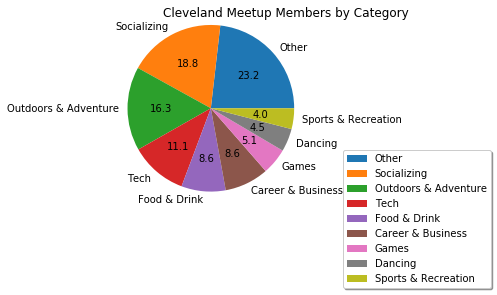

In [260]:
result3_df.plot(kind='pie',subplots=True,title='Cleveland Meetup Members by Category',
               autopct='%.1f')
plt.axis('equal')
import pylab
pylab.ylabel('')

plt.legend(loc=0,bbox_to_anchor=(1, .3),fontsize='medium',shadow=True)
plt.tight_layout()
plt.savefig('pie chart')
plt.show()


In [267]:
# Store latitude and longitude in locations
locations = result2_df[['lat','lon']]

# Fill NaN values and convert to float
rating = result2_df["members"].astype(int)


KeyError: "['lat' 'lon'] not in index"

In [268]:
# Plot as a Hybrid map
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=True, max_intensity=1000,
                                 point_radius=13)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [269]:
max_mem = result2_df['members'].max()
min_mem = result2_df['members'].min()
count_mem = result2_df['members'].sum()
#max_mem_group = 
#max_mem_group =
mem_group = count_mem/mem_count

print('Group with the most members')
print('---------------------------')
print(max_mem)
print()
print('Group with the least members')
print('---------------------------')
print(min_mem)
print()
print('Total member count')
print('---------------------------')
print(count_mem)
print('---------------------------')
print('On average, each Meetup member subscribes to ' + str(round(mem_group,1)) + ' groups')

Group with the most members
---------------------------
8414

Group with the least members
---------------------------
20

Total member count
---------------------------
209314
---------------------------
On average, each Meetup member subscribes to 6.4 groups


In [270]:
pivot_df = result2_df.pivot_table(values='members', index='category_name', aggfunc='sum')
pivot_df.head()

members
category_name             
Career & Business    17925
Dancing               9328
Food & Drink         17960
Games                10667
Other                48530

In [271]:
count_mem = result2_df['members'].sum()

pivot_df['percent_of_total'] = round(pivot_df['members'] / count_mem * 100,2)

pivot_df.sort_values('percent_of_total', ascending=False, inplace=True)
pivot_df.head()

members  percent_of_total
category_name                                  
Other                   48530             23.19
Socializing             39317             18.78
Outdoors & Adventure    34023             16.25
Tech                    23152             11.06
Food & Drink            17960              8.58